<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/N_Experiments_of_ARIMA_%2B_(SVR_%2B_PSO)_Val_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [3]:
uploaded = files.upload()   

Saving airlines2.txt to airlines2.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))

In [5]:
uploaded = files.upload()

Saving airlines2_ARIMA.txt to airlines2_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['airlines2_ARIMA.txt']))

In [7]:
uploaded = files.upload()

Saving airlines2_r.txt to airlines2_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['airlines2_r.txt']))

In [9]:
data_r.describe()

,Residuo
count,144.000000
mean,2.832599
std,29.757948
min,-86.729834
25%,-15.400285
50%,0.233500
75%,24.658117
max,81.595276


Original time series:



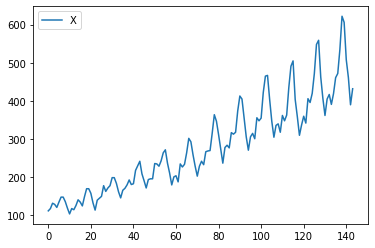

In [80]:
print('Original time series:\n')
data.plot()

Residuals over time:



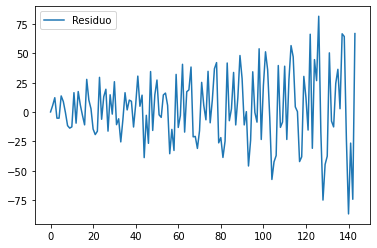

In [79]:
print('Residuals over time:\n')
data_r.plot()

In [11]:
len(data)

144

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = data_r.copy()

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [13]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

      Residuo   Residuo   Residuo  ...   Residuo   Residuo   Residuo
0    0.515917       NaN       NaN  ...       NaN       NaN       NaN
1    0.548651  0.515917       NaN  ...       NaN       NaN       NaN
2    0.587900  0.548651  0.515917  ...       NaN       NaN       NaN
3    0.484460  0.587900  0.548651  ...       NaN       NaN       NaN
4    0.484363  0.484460  0.587900  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
139  0.376937  0.897451  0.911189  ...  0.250371  0.070000  0.413713
140  0.000000  0.376937  0.897451  ...  0.292054  0.250371  0.070000
141  0.358242  0.000000  0.376937  ...  0.814766  0.292054  0.250371
142  0.073976  0.358242  0.000000  ...  0.469495  0.814766  0.292054
143  0.912230  0.073976  0.358242  ...  0.440188  0.469495  0.814766

[144 rows x 13 columns]


In [14]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3939, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5384, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


24
28
80


In [15]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

          ARIMA       ARIMA       ARIMA  ...       ARIMA       ARIMA       ARIMA
0    111.888000         NaN         NaN  ...         NaN         NaN         NaN
1    112.378158  111.888000         NaN  ...         NaN         NaN         NaN
2    119.771433  112.378158  111.888000  ...         NaN         NaN         NaN
3    134.183102  119.771433  112.378158  ...         NaN         NaN         NaN
4    126.199377  134.183102  119.771433  ...         NaN         NaN         NaN
..          ...         ...         ...  ...         ...         ...         ...
139  629.281833  557.666302  468.353843  ...  451.586191  537.947070  576.091574
140  594.729834  629.281833  557.666302  ...  399.569768  451.586191  537.947070
141  487.428775  594.729834  629.281833  ...  354.584335  399.569768  451.586191
142  464.277816  487.428775  594.729834  ...  424.702000  354.584335  399.569768
143  365.178562  464.277816  487.428775  ...  403.635172  424.702000  354.584335

[144 rows x 13 columns]


In [16]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.3939, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.5384, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

24
28
80


In [17]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

       X      X      X      X      X  ...      X      X      X      X      X
0    112    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
1    118  112.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
2    132  118.0  112.0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3    129  132.0  118.0  112.0    NaN  ...    NaN    NaN    NaN    NaN    NaN
4    121  129.0  132.0  118.0  112.0  ...    NaN    NaN    NaN    NaN    NaN
..   ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
139  606  622.0  535.0  472.0  461.0  ...  405.0  362.0  407.0  463.0  559.0
140  508  606.0  622.0  535.0  472.0  ...  417.0  405.0  362.0  407.0  463.0
141  461  508.0  606.0  622.0  535.0  ...  391.0  417.0  405.0  362.0  407.0
142  390  461.0  508.0  606.0  622.0  ...  419.0  391.0  417.0  405.0  362.0
143  432  390.0  461.0  508.0  606.0  ...  461.0  419.0  391.0  417.0  405.0

[144 rows x 13 columns]


In [18]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.3939, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.5384, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

24
28
80


In [0]:
def pso(n_particles, iterations, dimensions, inertia, k_best_particles, experiments):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    

    # Initializing regression variables    
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    # Initializing variables for experiment collection
    g_bests = []
    g_bests_RGS_experiment = []
    mse_residuals = []
    mse_residuals_val = []
    final_experiment_predictions = []
    final_experiment_predictions_val = []

    last_configurations = []
    
    average_particles = []
    average_particles_val = []
    mse_averages = []
    mse_averages_val = []
    final_experiment_averages = []
    final_experiment_averages_val = []

    median_particles = []
    median_particles_val = []
    mse_medians = []
    mse_medians_val = []
    final_experiment_medians = []
    final_experiment_medians_val = []

    average_k_best_predictions = []
    average_k_best_predictions_val = []
    mse_averages_k_best = []
    mse_averages_k_best_val = []
    final_experiment_k_averages = []
    final_experiment_k_averages_val = []

    median_k_best_predictions = []
    median_k_best_predictions_val = []
    mse_medians_k_best = []
    mse_medians_k_best_val = []
    final_experiment_k_medians = []
    final_experiment_k_medians_val = []

    mse_ARIMA = []
    mse_ARIMA_val = []
    
    mse_ensemble = []
    mse_ensemble_val = []

    from sklearn.metrics import mean_squared_error

    for e in range(experiments):
      
        # Initializing particles' positions randomly, inside
        # the search space
        x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
        y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
        z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

        c = np.concatenate((x,y,z), axis=1)

        if(e == 0):
            # Displaying tridimensional search space
            plot(c)

        # Initializing particles' parameters
        v = np.zeros((n_particles, dimensions))
        c1 = 2
        c2 = 2
        p_best = np.zeros((n_particles, dimensions))
        p_best_val = np.zeros(n_particles) + sys.maxsize  
        g_best = np.zeros(dimensions)
        g_best_val = sys.maxsize

        best_iter = np.zeros(iterations)

        for i in range(iterations):

            for j in range(n_particles):
              
                # Starting Regression
                rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

                # Fitting the curve
                rgs.fit(X_train, y_train)
                y_predict = rgs.predict(X_val)

                # Using Mean Squared Error to verify prediction accuracy
                mse = mean_squared_error(y_val, y_predict) 

                # If mse value for that search point, for that particle,
                # is less than its personal best point,
                # replace personal best
                if(mse < p_best_val[j]):   
                    # The value below represents the current least Mean Squared Error
                    p_best_val[j] = mse
                    
                    # The value below represents the current least Regressor
                    p_best_RGS[j] = rgs
                                

                    # The value below represents the current search coordinates for
                    # the particle's current least Mean Squared Error found
                    p_best[j] = c[j].copy()
                    
                # Using auxiliar variable to get the index of the
                # particle that found the configuration with the 
                # minimum MSE value
                aux = np.argmin(p_best_val)        
              
                if(p_best_val[aux] < g_best_val):
                    # Assigning Particle's current best MSE to the Group's best    
                    g_best_val = p_best_val[aux]

                    # Assigning Particle's current best configuration to the Group's best
                    g_best = p_best[aux].copy()

                    # Group best regressor:
                    # the combination of C, Epsilon and Gamma
                    # that computes the best fitting curve
                    g_best_RGS = p_best_RGS[aux]

              
                rand1 = np.random.random()
                rand2 = np.random.random()

                # The variable below influences directly the particle's velocity.
                # It can either make it smaller or bigger. 
                w = inertia

                # The equation below represents Particle's velocity, which is
                # the rate of change in its position
                v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

                # Change in the Particle's position 
                c[j] = c[j] + v[j]

                # Below is a series of conditions that stop the particles from
                # leaving the search space
                if(c[j][2] < min_g):
                  c[j][2] = min_g
                if(c[j][2] > max_g):
                  c[j][2] = max_g
                if(c[j][1] < min_e):
                  c[j][1] = min_e
                if(c[j][1] > max_e):
                  c[j][1] = max_e
                if(c[j][0] < min_c):
                  c[j][0] = min_c
                if(c[j][0] > max_c):
                  c[j][0] = max_c
                
        
        # Storing last particles` positions
        # for later use
        last_configurations.append(c)

        # Making the prediction with the best configuration of C, Epsilon and
        # Gamma found by the particles
        predict_val = g_best_RGS.predict(X_val)
        
        predict_test = g_best_RGS.predict(X_test)

     
        g_bests_RGS_experiment.append(g_best_RGS)
        g_bests.append(g_best)

      
        mse_r_val = mean_squared_error(y_val, predict_val)
        mse_r = mean_squared_error(y_test, predict_test)
        
   
        mse_residuals_val.append(mse_r_val)
        mse_residuals.append(mse_r)

       
        # Taking all particles' final predictions,
        # getting their averages and medians and
        # getting the k best subset of particles
        # to see the final prediction without outliers
        k = k_best_particles
        average_p_val, median_p_val, av_k_best_p_val, md_k_best_p_val = particles_last_predictions(c, n_particles, k, X_val, y_val)
        average_p, median_p, av_k_best_p, md_k_best_p = particles_last_predictions(c, n_particles, k, X_test, y_test)
       
        average_particles_val.append(average_p_val)
        median_particles_val.append(median_p_val)
        average_k_best_predictions_val.append(av_k_best_p_val)
        median_k_best_predictions_val.append(md_k_best_p_val)
             
        average_particles.append(average_p)
        median_particles.append(median_p)
        average_k_best_predictions.append(av_k_best_p)
        median_k_best_predictions.append(md_k_best_p)
       
        mse_e_val, mse_AR_val = residual_performance(predict_val, y_val_ARIMA, y_val_raw)
       
        mse_e, mse_AR = residual_performance(predict_test, y_test_ARIMA, y_test_raw)
       
        # Storing the Ensemble's (final system) mse
        mse_ARIMA_val.append(mse_AR_val)
        mse_ensemble_val.append(mse_e_val)
        
        mse_ARIMA.append(mse_AR)
        mse_ensemble.append(mse_e)
     
        # Storing the mse of the average predictions
        mse_A_val, mse_AR_val = residual_performance(average_p_val, y_val_ARIMA, y_val_raw)
        mse_A, mse_AR = residual_performance(average_p, y_test_ARIMA, y_test_raw)
   
        mse_averages_val.append(mse_A_val)
        mse_averages.append(mse_A)
       
        # Storing the mse of the average k best predictions
        mse_A_k_best_val, mse_AR_val = residual_performance(av_k_best_p_val, y_val_ARIMA, y_val_raw)
        mse_A_k_best, mse_AR = residual_performance(av_k_best_p, y_test_ARIMA, y_test_raw)
        
        mse_averages_k_best_val.append(mse_A_k_best_val)
        mse_averages_k_best.append(mse_A_k_best)
        
        # Storing the mse of the median predictions
        mse_M_val, mse_AR_val = residual_performance(median_p_val, y_val_ARIMA, y_val_raw)
        mse_M, mse_AR = residual_performance(median_p, y_test_ARIMA, y_test_raw)
        
        mse_medians_val.append(mse_M_val)
        mse_medians.append(mse_M)
        
        # Storing the mse of the median k best predictions
        mse_M_k_best_val, mse_AR_val = residual_performance(md_k_best_p_val, y_val_ARIMA, y_val_raw)
        mse_M_k_best, mse_AR = residual_performance(md_k_best_p, y_test_ARIMA, y_test_raw)
      
        mse_medians_k_best_val.append(mse_M_k_best_val)
        mse_medians_k_best.append(mse_M_k_best)
      
        # Getting the final results of the current experiment
        # and storing them
        final_exp_p_val, final_exp_av_val, final_exp_md_val, final_exp_av_k_val, final_exp_md_k_val = results(g_best_RGS, average_p_val, median_p_val, av_k_best_p_val, md_k_best_p_val, y_val_raw, y_val_ARIMA, X_val)
               

        final_exp_p, final_exp_av, final_exp_md, final_exp_av_k, final_exp_md_k = results(g_best_RGS, average_p, median_p, av_k_best_p, md_k_best_p, y_test_raw, y_test_ARIMA, X_test)
        
     

        final_exp_p_val = final_exp_p_val.tolist()
        final_exp_av_val = final_exp_av_val.tolist()
        final_exp_md_val = final_exp_md_val.tolist()
        final_exp_av_k_val = final_exp_av_k_val.tolist()
        final_exp_md_k_val = final_exp_md_k_val.tolist()
     
        final_exp_p = final_exp_p.tolist()
        final_exp_av = final_exp_av.tolist()
        final_exp_md = final_exp_md.tolist()
        final_exp_av_k = final_exp_av_k.tolist()
        final_exp_md_k = final_exp_md_k.tolist()
      
                
        final_experiment_predictions_val.append(final_exp_p_val)
        final_experiment_averages_val.append(final_exp_av_val)
        final_experiment_medians_val.append(final_exp_md_val)
        final_experiment_k_averages_val.append(final_exp_av_k_val)
        final_experiment_k_medians_val.append(final_exp_md_k_val)
     
        final_experiment_predictions.append(final_exp_p)
        final_experiment_averages.append(final_exp_av)
        final_experiment_medians.append(final_exp_md)
        final_experiment_k_averages.append(final_exp_av_k)
        final_experiment_k_medians.append(final_exp_md_k)
      
        print('\nExperiment # %d: done. MSE_g_Best_val: %f; MSE_AV_val: %f; MSE_MD_val: %f; MSE_k_AV_val: %f; MSE_k_MD_val: %f\n'%(e+1, mse_e_val, mse_A_val, mse_M_val, mse_A_k_best_val,mse_M_k_best_val))
        print('\nMSE_g_Best: %f; MSE_AV: %f; MSE_MD: %f; MSE_k_AV: %f; MSE_k_MD: %f\n'%(mse_e, mse_A, mse_M, mse_A_k_best, mse_M_k_best)) 
                                                                             
                                                                              

    aux_result_1_val = np.argmin(mse_ensemble_val)
    aux_result_1 = np.argmin(mse_ensemble)

    mse_final_val = mse_ensemble_val[aux_result_1_val]
    mse_final = mse_ensemble[aux_result_1]

    #print('Debug 1')

    aux_result_2_val = np.argmin(mse_residuals_val)
    aux_result_2 = np.argmin(mse_residuals)

    best_regression = g_bests_RGS_experiment[aux_result_2]
    best_configuration = g_bests[aux_result_2]

    c = last_configurations[aux_result_2]

    probable_best_predictions_val = final_experiment_predictions_val[aux_result_2_val]
    probable_best_predictions = final_experiment_predictions[aux_result_2]

    corresponding_average_val = final_experiment_averages_val[aux_result_2_val]
    corresponding_average = final_experiment_averages[aux_result_2]

    corresponding_median_val = final_experiment_medians_val[aux_result_2_val]
    corresponding_median = final_experiment_medians[aux_result_2]

    corresponding_k_average_val = final_experiment_k_averages_val[aux_result_2_val]
    corresponding_k_average = final_experiment_k_averages[aux_result_2]

    corresponding_k_median_val = final_experiment_k_medians_val[aux_result_2_val]
    corresponding_k_median = final_experiment_k_medians[aux_result_2]

    #print('Debug 2')
    print(color.BOLD + '\n Displaying Results for the validation set\n' + color.BOLD)

    display_results(best_regression, y_val_raw, y_val_ARIMA, 
                    probable_best_predictions_val, corresponding_average_val, corresponding_median_val, 
                    corresponding_k_average_val, corresponding_k_median_val,c)

    
    print(color.BOLD + '\n Displaying Results for the test set\n' + color.BOLD)
    display_results(best_regression, y_test_raw, y_test_ARIMA, 
                    probable_best_predictions, corresponding_average, corresponding_median, 
                    corresponding_k_average, corresponding_k_median,c)
                    


    #print('Debug 3')

    #final_experiment_predictions_T = list(map(list, zip(*final_experiment_predictions)))
    #final_experiment_averages_T = list(map(list, zip(*final_experiment_averages)))
    #final_experiment_medians_T = list(map(list, zip(*final_experiment_medians)))
    #final_experiment_k_averages_T = list(map(list, zip(*final_experiment_k_averages)))
    #final_experiment_k_medians_T = list(map(list, zip(*final_experiment_k_medians)))

    final_experiment_predictions_concat_val = [item for sublist in final_experiment_predictions_val for item in sublist] 
    final_experiment_averages_concat_val = [item for sublist in final_experiment_averages_val for item in sublist]
    final_experiment_medians_concat_val = [item for sublist in final_experiment_medians_val for item in sublist]
    final_experiment_k_averages_concat_val = [item for sublist in final_experiment_k_averages_val for item in sublist]
    final_experiment_k_medians_concat_val = [item for sublist in final_experiment_k_medians_val for item in sublist]


    final_experiment_predictions_concat = [item for sublist in final_experiment_predictions for item in sublist] 
    final_experiment_averages_concat = [item for sublist in final_experiment_averages for item in sublist]
    final_experiment_medians_concat = [item for sublist in final_experiment_medians for item in sublist]
    final_experiment_k_averages_concat = [item for sublist in final_experiment_k_averages for item in sublist]
    final_experiment_k_medians_concat = [item for sublist in final_experiment_k_medians for item in sublist]


    print(color.BOLD + '\nBest G-best on val set: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1_val+1, mse_final_val) + color.BOLD )  

    print(color.BOLD + '\nBest G-best on test set: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1+1, mse_final) + color.BOLD )

    pd.options.display.float_format = '${:,.2f}'.format
    final_results_val = pd.DataFrame()
        
    final_results_val["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat_val
    final_results_val["Previsoes com as Medias"] = final_experiment_averages_concat_val
    final_results_val["Previsoes com as Medianas"] = final_experiment_medians_concat_val
    final_results_val["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat_val
    final_results_val["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat_val

    
    pd.options.display.float_format = '${:,.2f}'.format
    final_results = pd.DataFrame()
        
    final_results["Previsoes com o G_Best (Sistema Final)"] = final_experiment_predictions_concat
    final_results["Previsoes com as Medias"] = final_experiment_averages_concat
    final_results["Previsoes com as Medianas"] = final_experiment_medians_concat
    final_results["Previsoes com a Media das K melhores particulas"] = final_experiment_k_averages_concat
    final_results["Previsoes com a Mediana das K melhores particulas"] = final_experiment_k_medians_concat
    

    final_mse_val = pd.DataFrame()
    
    final_mse_val["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse_val["MSE da Previsao do Sistema Final"] = mse_ensemble_val
    final_mse_val["MSE da Previsao das Medias"] = mse_averages_val
    final_mse_val["MSE da Previsao das Medianas"] = mse_medians_val
    final_mse_val["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best_val
    final_mse_val["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best_val
    final_mse_val["MSE da Previsao do ARIMA"] = mse_ARIMA_val


    final_mse = pd.DataFrame()
    
    final_mse["Melhores Configuracoes (G_Bests)"] = g_bests
    final_mse["MSE da Previsao do Sistema Final"] = mse_ensemble
    final_mse["MSE da Previsao das Medias"] = mse_averages
    final_mse["MSE da Previsao das Medianas"] = mse_medians
    final_mse["MSE da Previsao das Medias das K melhores particulas"] = mse_averages_k_best
    final_mse["MSE da Previsao das Medianas das K melhores particulas"] = mse_medians_k_best
    final_mse["MSE da Previsao do ARIMA"] = mse_ARIMA


    final_results_val.to_csv("Val_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse_val.to_csv("Val_MSE_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_results.to_csv("Test_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

    final_mse.to_csv("Test_MSE_Airlines_Experiments_Inertia_" + str(w) + "_K_subset_" + str(k) + "_.csv", index = False, header = True)

In [0]:
def results(regression, average, median, k_average, k_median, y_raw, y_ARIMA, X_residual):
    
    import numpy as np

    data = y_raw
    ARIMA = y_ARIMA
    ARIMA = ARIMA.to_list()
    test = X_residual

    average_residuals = average
    median_residuals = median

    k_average_residuals = k_average
    k_median_residuals = k_median
    #print('Debug Inside 1')

    #print(regression)
    
    tmp = regression.predict(test)
    #print('Debug Inside 2')


    residuals = tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A = average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M = median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A_k = k_average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M_k = k_median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

    final_predictions = ARIMA + residuals
    final_predictions_average = ARIMA + residuals_A
    final_predictions_median = ARIMA + residuals_M
    final_predictions_average_k = ARIMA + residuals_A_k
    final_predictions_median_k = ARIMA + residuals_M_k
    #print('Debug Inside 3')

    
    return final_predictions, final_predictions_average, final_predictions_median, final_predictions_average_k, final_predictions_median_k


In [0]:
def display_results(configuration, y_raw, y_ARIMA,
                    final_predictions, final_predictions_average, final_predictions_median,  
                    final_predictions_k_average, final_predictions_k_median, all_particles):

    from sklearn.metrics import mean_squared_error
    
    data = y_raw
    ARIMA = y_ARIMA

    plot(all_particles)

    mse_ARIMA = mean_squared_error(ARIMA, data)
    mse = mean_squared_error(final_predictions, data)
    mse_A = mean_squared_error(final_predictions_average, data)
    mse_M = mean_squared_error(final_predictions_median, data)
    mse_k_A = mean_squared_error(final_predictions_k_average, data)
    mse_k_M = mean_squared_error(final_predictions_k_median, data)

    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse_ARIMA)
    print('\nBest Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse)
    print('\nMean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_A)
    print('\nMean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_A)   
    print('\nMean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_M)
    print('\nMean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_k_M)


    print('\nBest Configuration Found:\n')
    print(configuration)

    print('\n')
    print('\n')
    print(color.BOLD + '\nARIMA Model series` predicitions:\n' + color.BOLD)

    plot_results(ARIMA, y_raw)  


    print(color.BOLD + '\nEnsemble Model series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions, y_raw)


    print(color.BOLD + '\nEnsemble Model best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_average, y_raw)

    
    print(color.BOLD + '\nEnsemble Model K best Average series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_average, y_raw)


    print(color.BOLD + '\nEnsemble Model best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_median, y_raw)

    
    print(color.BOLD + '\nEnsemble Model K best Median series` predicitions:\n' + color.BOLD)

    plot_results(final_predictions_k_median, y_raw)

    print('\n')
    print('\n')

In [0]:
def plot_results(predictions, y_raw):

    plt.plot(range(len(y_raw)), y_raw, label='Real')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.legend()
    plt.show()

In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)
    

    return mse1, mse2

In [0]:
def particles_last_predictions(configurations, particles, k, X, y):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predictions = []
    mse = []

    for p in range(particles):

        rgs = svm.SVR(C = configurations[p][0], epsilon = configurations[p][1], gamma = configurations[p][2])

        rgs.fit(X_train, y_train) 
        y_predict = rgs.predict(X) 

        mse.append(mean_squared_error(y_predict, y))
        predictions.append(y_predict)
    
    #print('Debug inside 1')

    total = [sum(x) for x in zip(*predictions)]
    #print('Debug inside 2')  
    
    average = [num/particles for num in total]
    #print('Debug inside 3')

    median = [st.median(num) for num in zip(*predictions)]

    predictions = np.array(predictions)
    id_k = np.argpartition(mse, k)
    k_best_pred = predictions[id_k[:k]]

    k_total = [sum(x) for x in zip(*k_best_pred)]

    av_k_best_pred = [num/k for num in k_total]

    md_k_best_pred = [st.median(num) for num in zip(*k_best_pred)]
    #print('Debug inside 5')


    return average, median, av_k_best_pred, md_k_best_pred

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'b')
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()

    print('\n')
    print('\n')

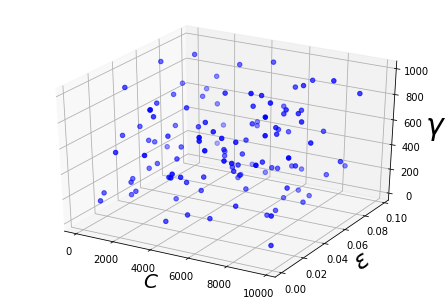






Experiment # 1: done. MSE_g_Best_val: 249.273343; MSE_AV_val: 340.477131; MSE_MD_val: 285.241269; MSE_k_AV_val: 252.029490; MSE_k_MD_val: 253.768304


MSE_g_Best: 794.142232; MSE_AV: 901.592346; MSE_MD: 833.021070; MSE_k_AV: 777.440777; MSE_k_MD: 780.078469


Experiment # 2: done. MSE_g_Best_val: 249.190664; MSE_AV_val: 343.066204; MSE_MD_val: 286.293655; MSE_k_AV_val: 249.695760; MSE_k_MD_val: 252.076587


MSE_g_Best: 794.825983; MSE_AV: 905.411618; MSE_MD: 834.748783; MSE_k_AV: 770.156618; MSE_k_MD: 782.401103


Experiment # 3: done. MSE_g_Best_val: 249.116342; MSE_AV_val: 343.274639; MSE_MD_val: 285.209643; MSE_k_AV_val: 251.598173; MSE_k_MD_val: 251.742383


MSE_g_Best: 793.748459; MSE_AV: 908.155688; MSE_MD: 837.215138; MSE_k_AV: 778.709355; MSE_k_MD: 779.951760


Experiment # 4: done. MSE_g_Best_val: 249.001192; MSE_AV_val: 353.764102; MSE_MD_val: 280.440908; MSE_k_AV_val: 252.458231; MSE_k_MD_val: 253.883598


MSE_g_Best: 791.925031; MSE_AV: 921.109596; MSE_MD: 822.954709; 

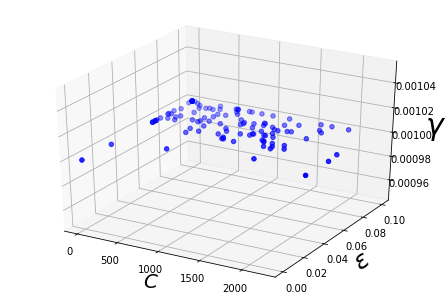






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.950316

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 337.126984

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 250.690981

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 284.813283

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 249.145370

Best Configuration Found:

SVR(C=648.0048750579551, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08295793905149847, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



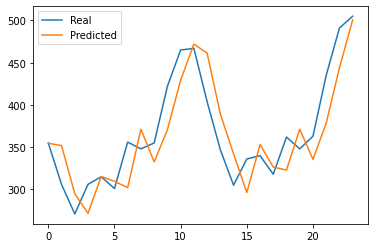


Ensemble Model series` predicitions:



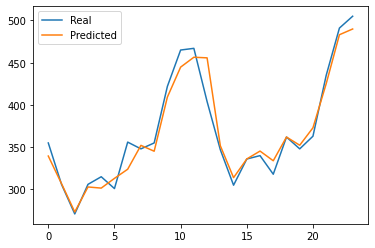


Ensemble Model best Average series` predicitions:



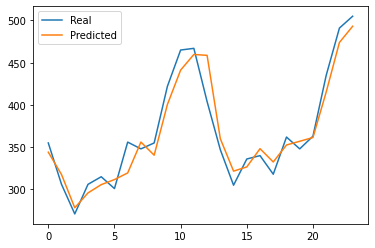


Ensemble Model K best Average series` predicitions:



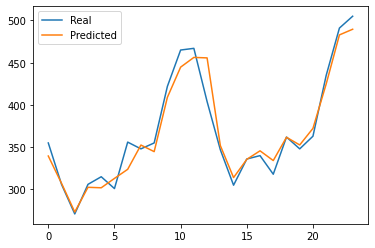


Ensemble Model best Median series` predicitions:



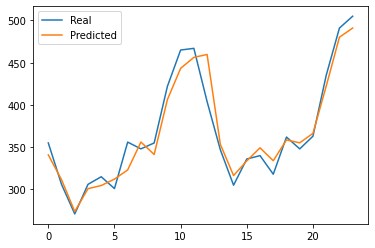


Ensemble Model K best Median series` predicitions:



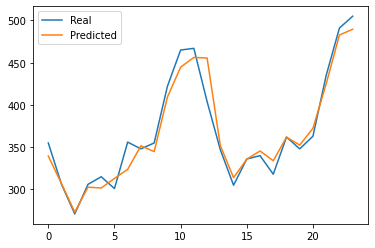






 Displaying Results for the test set



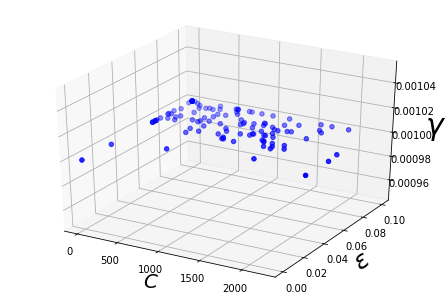






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.925031

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 921.109596

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 778.352590

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 822.954709

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 775.378017

Best Configuration Found:

SVR(C=648.0048750579551, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08295793905149847, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



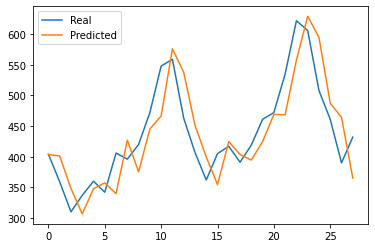


Ensemble Model series` predicitions:



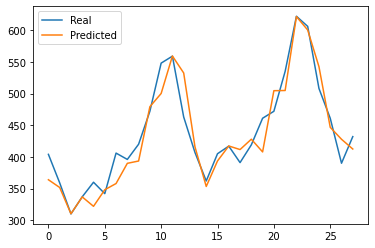


Ensemble Model best Average series` predicitions:



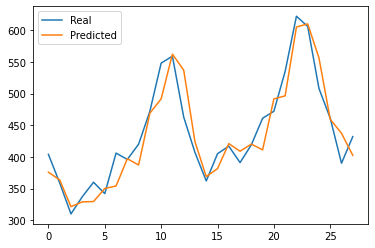


Ensemble Model K best Average series` predicitions:



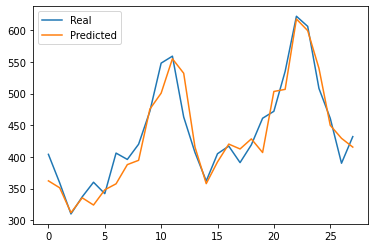


Ensemble Model best Median series` predicitions:



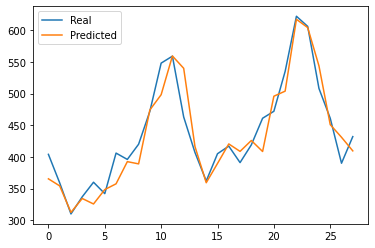


Ensemble Model K best Median series` predicitions:



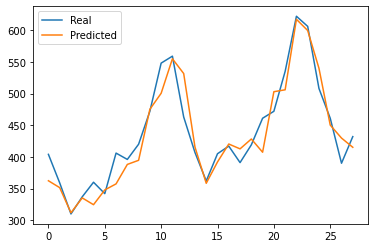






Best G-best on val set: Experiment # 5 . Mean Squared Error = 248.950316


Best G-best on test set: Experiment # 4 . Mean Squared Error = 791.925031



In [72]:
pso(120, 100, 3, 1, 5, 5)

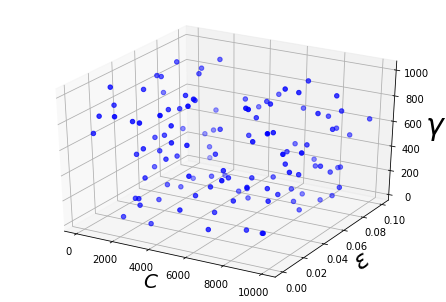






Experiment # 1: done. MSE_g_Best_val: 248.811129; MSE_AV_val: 390.435718; MSE_MD_val: 298.559845; MSE_k_AV_val: 251.669091; MSE_k_MD_val: 252.001627


MSE_g_Best: 795.552344; MSE_AV: 970.586834; MSE_MD: 849.120641; MSE_k_AV: 780.969306; MSE_k_MD: 777.602114


Experiment # 2: done. MSE_g_Best_val: 249.037387; MSE_AV_val: 338.720182; MSE_MD_val: 286.256468; MSE_k_AV_val: 248.655543; MSE_k_MD_val: 252.790056


MSE_g_Best: 793.281615; MSE_AV: 898.993568; MSE_MD: 828.092804; MSE_k_AV: 779.600027; MSE_k_MD: 780.015514


Experiment # 3: done. MSE_g_Best_val: 249.138221; MSE_AV_val: 348.078041; MSE_MD_val: 283.845670; MSE_k_AV_val: 252.805244; MSE_k_MD_val: 254.678798


MSE_g_Best: 794.168112; MSE_AV: 912.702503; MSE_MD: 826.696769; MSE_k_AV: 779.218297; MSE_k_MD: 782.376184


Experiment # 4: done. MSE_g_Best_val: 249.152764; MSE_AV_val: 338.211181; MSE_MD_val: 280.949957; MSE_k_AV_val: 251.419020; MSE_k_MD_val: 253.510008


MSE_g_Best: 794.596155; MSE_AV: 899.932267; MSE_MD: 819.547735; 

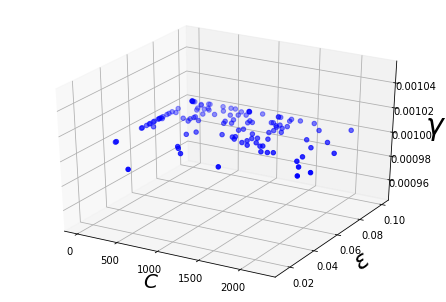






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.811129

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 390.435718

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 251.669091

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 298.559845

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 252.001627

Best Configuration Found:

SVR(C=688.6896738139918, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08250052753298255, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



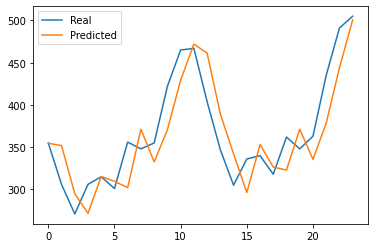


Ensemble Model series` predicitions:



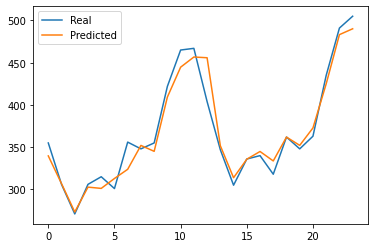


Ensemble Model best Average series` predicitions:



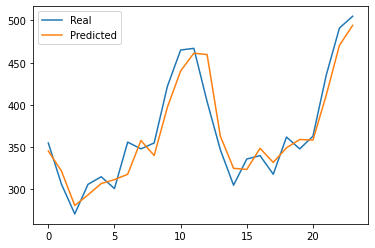


Ensemble Model K best Average series` predicitions:



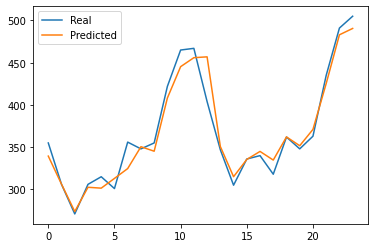


Ensemble Model best Median series` predicitions:



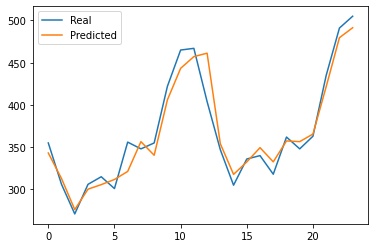


Ensemble Model K best Median series` predicitions:



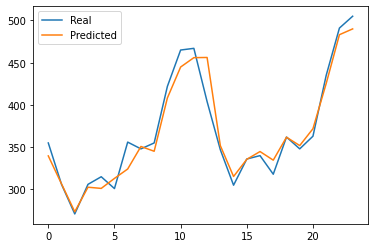






 Displaying Results for the test set



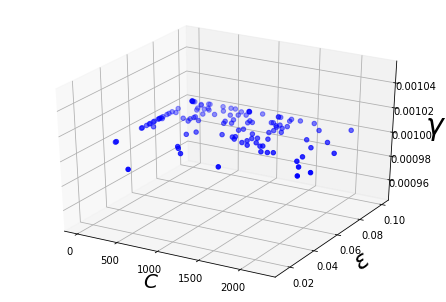






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 793.281615

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 898.993568

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 779.600027

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 828.092804

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 780.015514

Best Configuration Found:

SVR(C=688.6896738139918, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08250052753298255, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



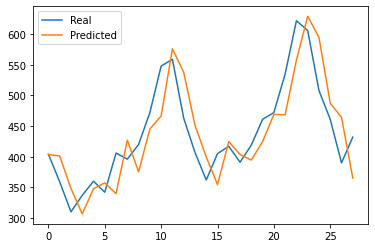


Ensemble Model series` predicitions:



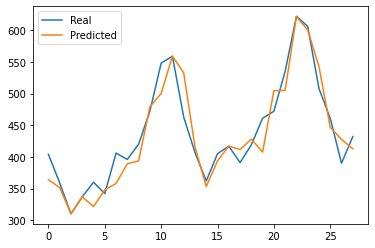


Ensemble Model best Average series` predicitions:



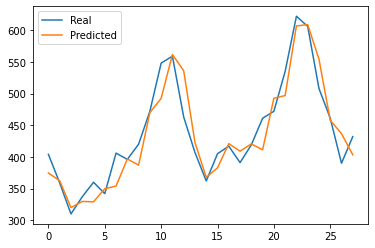


Ensemble Model K best Average series` predicitions:



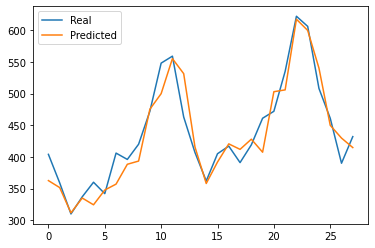


Ensemble Model best Median series` predicitions:



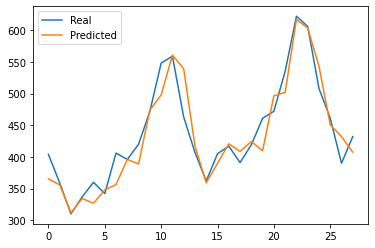


Ensemble Model K best Median series` predicitions:



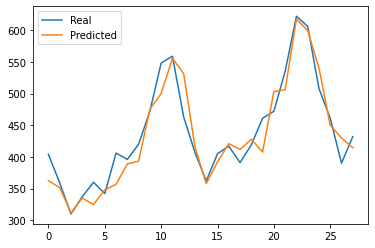






Best G-best on val set: Experiment # 1 . Mean Squared Error = 248.811129


Best G-best on test set: Experiment # 2 . Mean Squared Error = 793.281615



In [73]:
pso(120, 100, 3, 1, 10, 5)

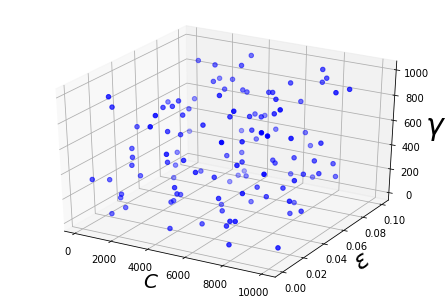






Experiment # 1: done. MSE_g_Best_val: 248.958753; MSE_AV_val: 373.717209; MSE_MD_val: 286.926867; MSE_k_AV_val: 251.545563; MSE_k_MD_val: 254.253558


MSE_g_Best: 795.076180; MSE_AV: 950.386388; MSE_MD: 839.220882; MSE_k_AV: 776.520321; MSE_k_MD: 781.339721


Experiment # 2: done. MSE_g_Best_val: 249.119952; MSE_AV_val: 364.995073; MSE_MD_val: 291.309978; MSE_k_AV_val: 251.287368; MSE_k_MD_val: 251.506343


MSE_g_Best: 792.648222; MSE_AV: 939.197167; MSE_MD: 837.003848; MSE_k_AV: 787.300968; MSE_k_MD: 781.267116


Experiment # 3: done. MSE_g_Best_val: 248.798922; MSE_AV_val: 327.604391; MSE_MD_val: 281.926872; MSE_k_AV_val: 248.779198; MSE_k_MD_val: 254.842636


MSE_g_Best: 794.946394; MSE_AV: 884.996354; MSE_MD: 838.627336; MSE_k_AV: 782.026434; MSE_k_MD: 777.770513


Experiment # 4: done. MSE_g_Best_val: 249.024254; MSE_AV_val: 348.632018; MSE_MD_val: 280.126059; MSE_k_AV_val: 252.383706; MSE_k_MD_val: 260.781994


MSE_g_Best: 793.153859; MSE_AV: 912.145216; MSE_MD: 813.407111; 

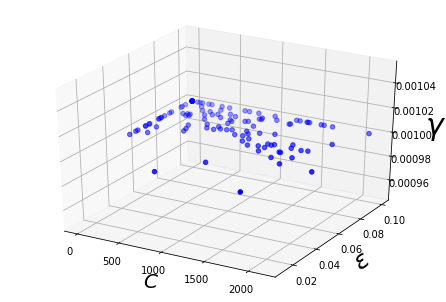






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.798922

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 327.604391

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 248.779198

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 281.926872

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 254.842636

Best Configuration Found:

SVR(C=693.187927905853, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08240562935440825, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



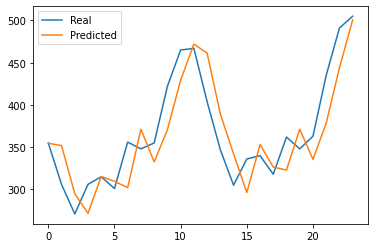


Ensemble Model series` predicitions:



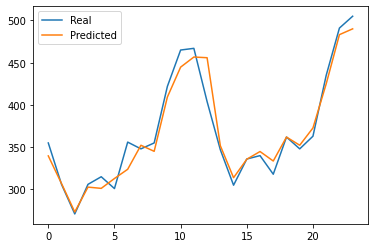


Ensemble Model best Average series` predicitions:



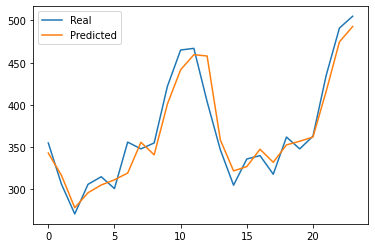


Ensemble Model K best Average series` predicitions:



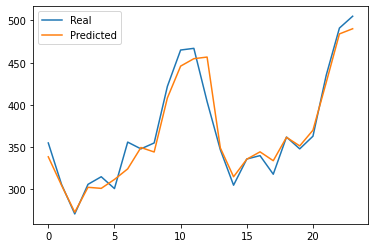


Ensemble Model best Median series` predicitions:



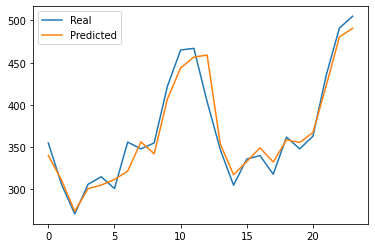


Ensemble Model K best Median series` predicitions:



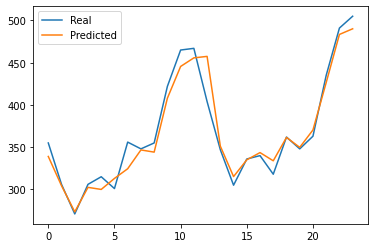






 Displaying Results for the test set



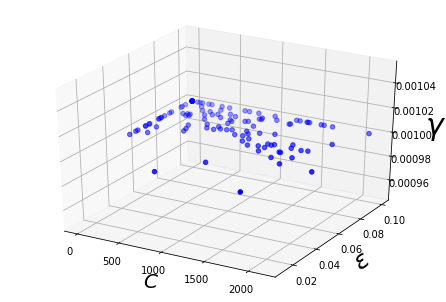






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.648222

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 939.197167

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 787.300968

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 837.003848

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 781.267116

Best Configuration Found:

SVR(C=693.187927905853, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08240562935440825, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



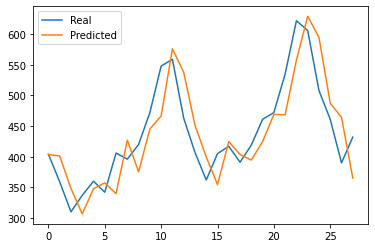


Ensemble Model series` predicitions:



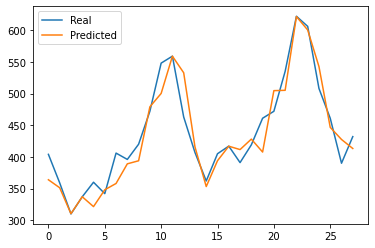


Ensemble Model best Average series` predicitions:



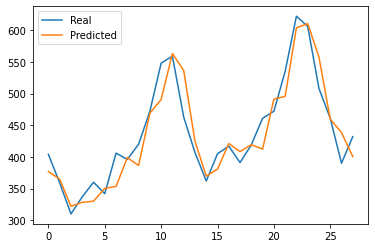


Ensemble Model K best Average series` predicitions:



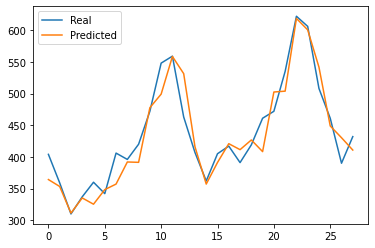


Ensemble Model best Median series` predicitions:



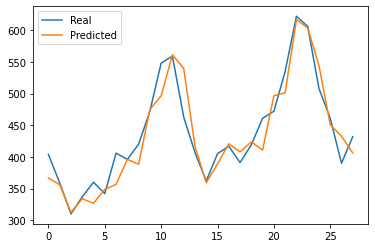


Ensemble Model K best Median series` predicitions:



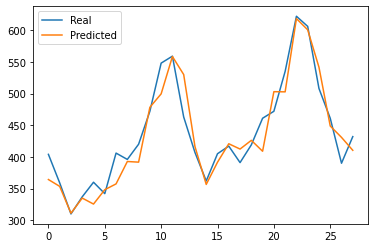






Best G-best on val set: Experiment # 3 . Mean Squared Error = 248.798922


Best G-best on test set: Experiment # 2 . Mean Squared Error = 792.648222



In [74]:
pso(120, 100, 3, 1, 20, 5)

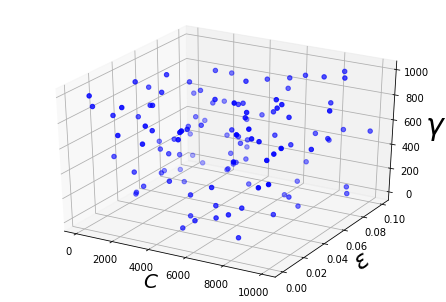






Experiment # 1: done. MSE_g_Best_val: 249.061807; MSE_AV_val: 365.268469; MSE_MD_val: 285.051089; MSE_k_AV_val: 250.714536; MSE_k_MD_val: 256.380597


MSE_g_Best: 794.523452; MSE_AV: 935.877231; MSE_MD: 822.554146; MSE_k_AV: 780.384658; MSE_k_MD: 784.118237


Experiment # 2: done. MSE_g_Best_val: 249.083401; MSE_AV_val: 365.617561; MSE_MD_val: 290.110215; MSE_k_AV_val: 252.777606; MSE_k_MD_val: 257.018613


MSE_g_Best: 794.451037; MSE_AV: 937.570619; MSE_MD: 840.314492; MSE_k_AV: 787.091045; MSE_k_MD: 797.228488


Experiment # 3: done. MSE_g_Best_val: 249.035632; MSE_AV_val: 367.373687; MSE_MD_val: 290.723008; MSE_k_AV_val: 252.190385; MSE_k_MD_val: 253.773238


MSE_g_Best: 794.436683; MSE_AV: 936.595989; MSE_MD: 843.416332; MSE_k_AV: 783.743994; MSE_k_MD: 780.697166


Experiment # 4: done. MSE_g_Best_val: 249.128340; MSE_AV_val: 366.705507; MSE_MD_val: 288.983724; MSE_k_AV_val: 253.094609; MSE_k_MD_val: 253.842726


MSE_g_Best: 792.513989; MSE_AV: 938.515532; MSE_MD: 830.430134; 

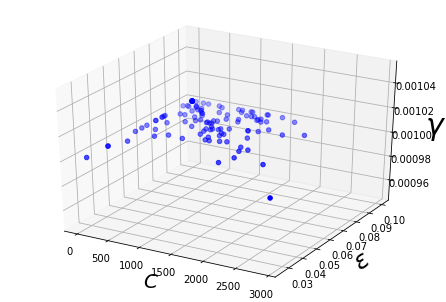






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 249.035632

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 367.373687

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 252.190385

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 290.723008

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 253.773238

Best Configuration Found:

SVR(C=669.3553912414154, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08283223330044057, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



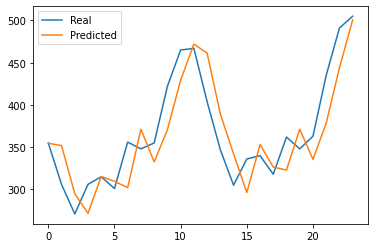


Ensemble Model series` predicitions:



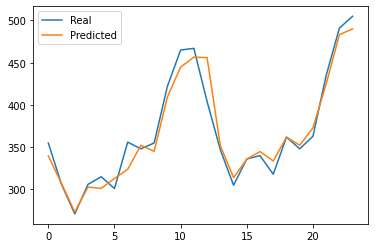


Ensemble Model best Average series` predicitions:



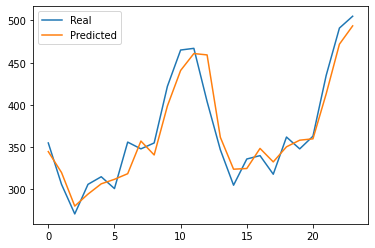


Ensemble Model K best Average series` predicitions:



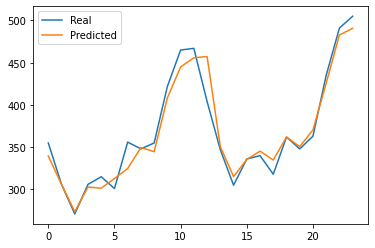


Ensemble Model best Median series` predicitions:



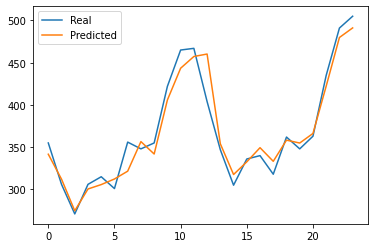


Ensemble Model K best Median series` predicitions:



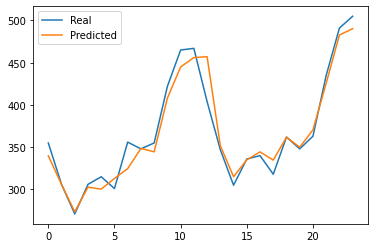






 Displaying Results for the test set



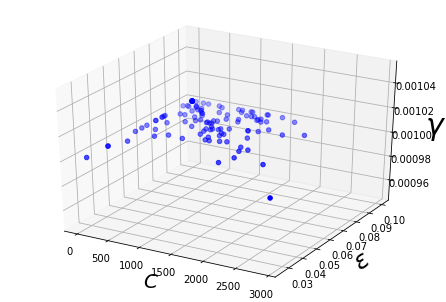






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.513989

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 938.515532

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 787.742610

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 830.430134

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 777.501886

Best Configuration Found:

SVR(C=669.3553912414154, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08283223330044057, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



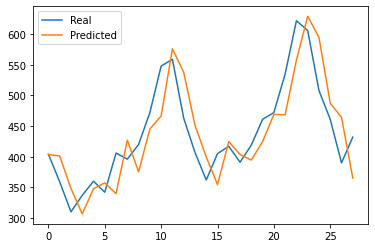


Ensemble Model series` predicitions:



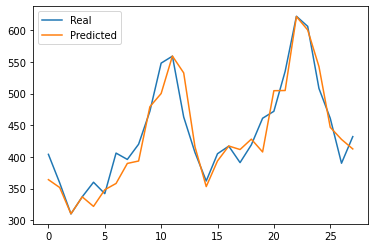


Ensemble Model best Average series` predicitions:



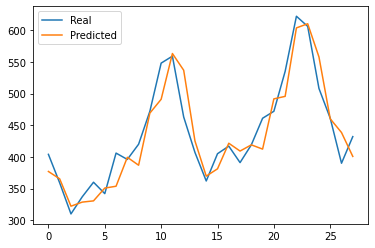


Ensemble Model K best Average series` predicitions:



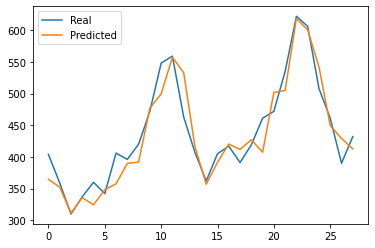


Ensemble Model best Median series` predicitions:



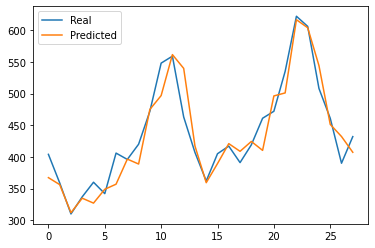


Ensemble Model K best Median series` predicitions:



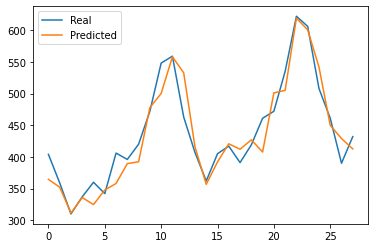






Best G-best on val set: Experiment # 3 . Mean Squared Error = 249.035632


Best G-best on test set: Experiment # 4 . Mean Squared Error = 792.513989



In [75]:
pso(120, 100, 3, 1, 30, 5)

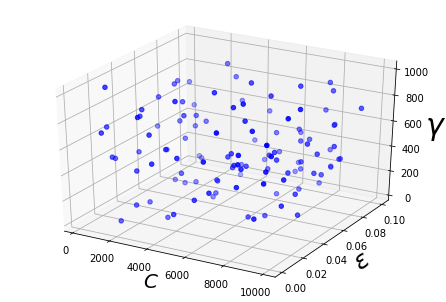






Experiment # 1: done. MSE_g_Best_val: 249.038203; MSE_AV_val: 378.169161; MSE_MD_val: 292.741792; MSE_k_AV_val: 251.413470; MSE_k_MD_val: 256.200898


MSE_g_Best: 795.882326; MSE_AV: 956.940702; MSE_MD: 858.191727; MSE_k_AV: 789.623868; MSE_k_MD: 790.398312


Experiment # 2: done. MSE_g_Best_val: 249.271811; MSE_AV_val: 360.631427; MSE_MD_val: 288.481947; MSE_k_AV_val: 252.044705; MSE_k_MD_val: 254.276386


MSE_g_Best: 795.586367; MSE_AV: 929.090950; MSE_MD: 825.201569; MSE_k_AV: 788.219013; MSE_k_MD: 789.684637


Experiment # 3: done. MSE_g_Best_val: 249.201478; MSE_AV_val: 323.435877; MSE_MD_val: 278.840143; MSE_k_AV_val: 252.430131; MSE_k_MD_val: 256.068631


MSE_g_Best: 794.484566; MSE_AV: 876.147378; MSE_MD: 823.833006; MSE_k_AV: 782.680317; MSE_k_MD: 782.579755


Experiment # 4: done. MSE_g_Best_val: 249.156487; MSE_AV_val: 344.911787; MSE_MD_val: 281.946575; MSE_k_AV_val: 250.571870; MSE_k_MD_val: 257.496253


MSE_g_Best: 792.608538; MSE_AV: 909.342138; MSE_MD: 823.103202; 

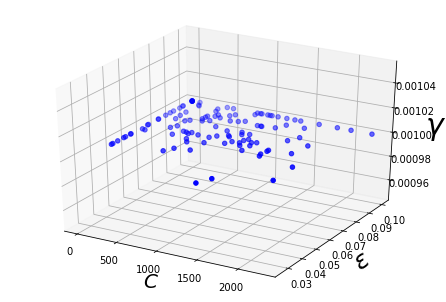






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 249.034582

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 337.351608

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 251.466047

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 280.927179

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 255.254278

Best Configuration Found:

SVR(C=640.527151530218, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08284675678299558, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



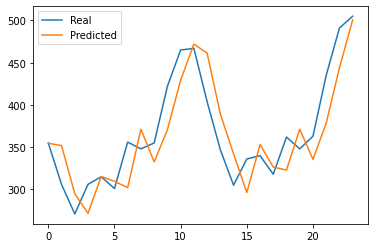


Ensemble Model series` predicitions:



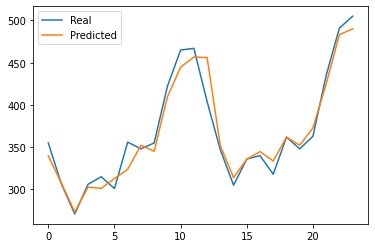


Ensemble Model best Average series` predicitions:



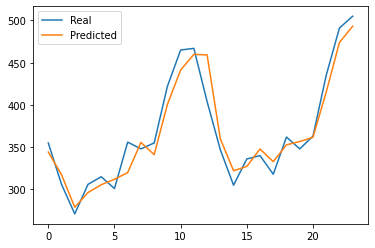


Ensemble Model K best Average series` predicitions:



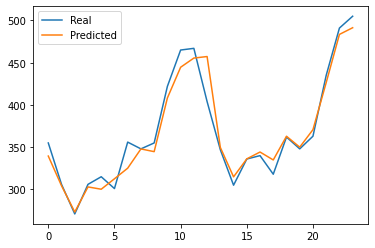


Ensemble Model best Median series` predicitions:



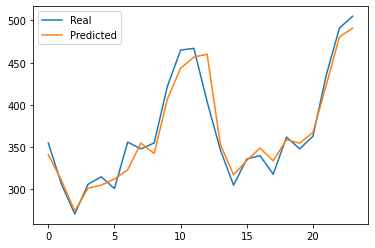


Ensemble Model K best Median series` predicitions:



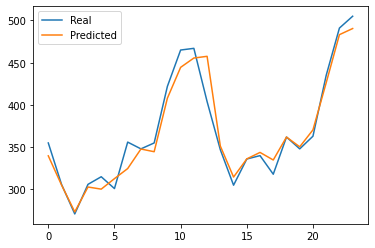






 Displaying Results for the test set



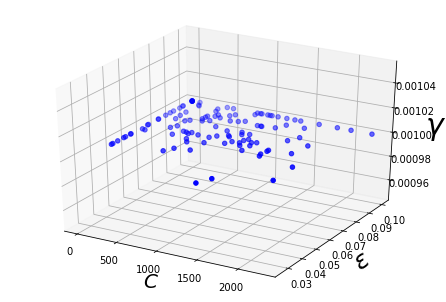






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.608538

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 909.342138

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 788.137506

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 823.103202

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 787.024575

Best Configuration Found:

SVR(C=640.527151530218, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08284675678299558, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



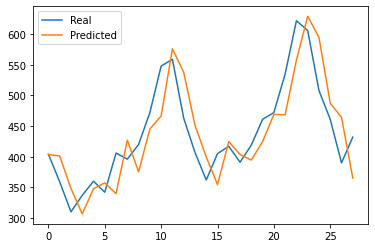


Ensemble Model series` predicitions:



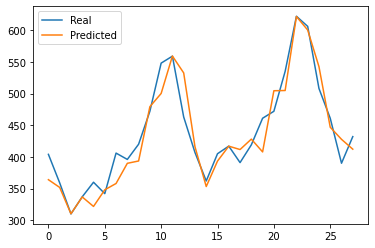


Ensemble Model best Average series` predicitions:



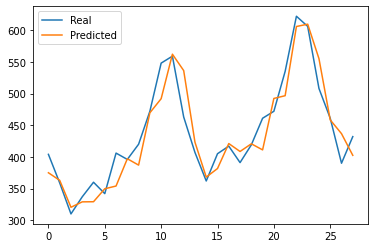


Ensemble Model K best Average series` predicitions:



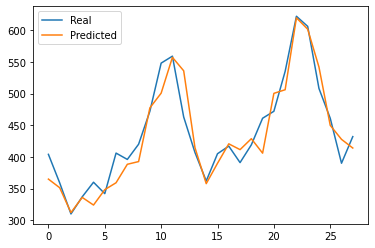


Ensemble Model best Median series` predicitions:



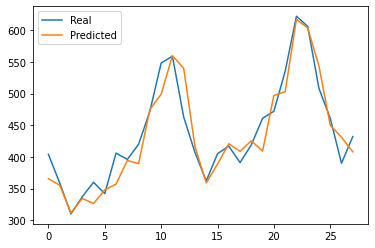


Ensemble Model K best Median series` predicitions:



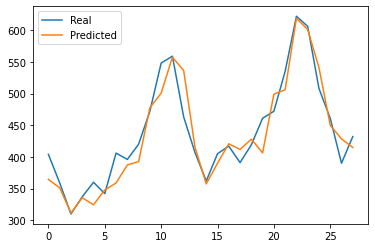






Best G-best on val set: Experiment # 5 . Mean Squared Error = 249.034582


Best G-best on test set: Experiment # 4 . Mean Squared Error = 792.608538



In [76]:
pso(120, 100, 3, 1, 40, 5)

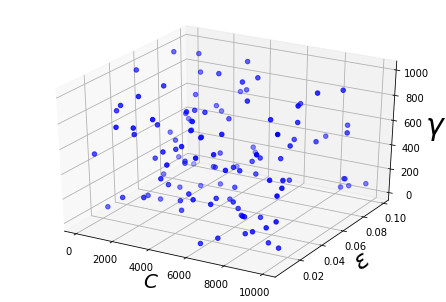






Experiment # 1: done. MSE_g_Best_val: 249.175385; MSE_AV_val: 387.691219; MSE_MD_val: 292.321723; MSE_k_AV_val: 254.058901; MSE_k_MD_val: 254.804618


MSE_g_Best: 791.911640; MSE_AV: 968.702999; MSE_MD: 850.102664; MSE_k_AV: 792.355612; MSE_k_MD: 793.838801


Experiment # 2: done. MSE_g_Best_val: 248.976839; MSE_AV_val: 329.321431; MSE_MD_val: 279.158863; MSE_k_AV_val: 253.672571; MSE_k_MD_val: 257.968610


MSE_g_Best: 795.067188; MSE_AV: 888.354655; MSE_MD: 817.056508; MSE_k_AV: 791.845226; MSE_k_MD: 788.212392


Experiment # 3: done. MSE_g_Best_val: 249.099980; MSE_AV_val: 346.083110; MSE_MD_val: 286.043348; MSE_k_AV_val: 253.989867; MSE_k_MD_val: 258.234458


MSE_g_Best: 796.556076; MSE_AV: 908.239976; MSE_MD: 829.685681; MSE_k_AV: 789.423484; MSE_k_MD: 798.761026


Experiment # 4: done. MSE_g_Best_val: 248.962559; MSE_AV_val: 335.450912; MSE_MD_val: 280.948256; MSE_k_AV_val: 252.721609; MSE_k_MD_val: 255.620868


MSE_g_Best: 792.487039; MSE_AV: 896.833069; MSE_MD: 828.352833; 

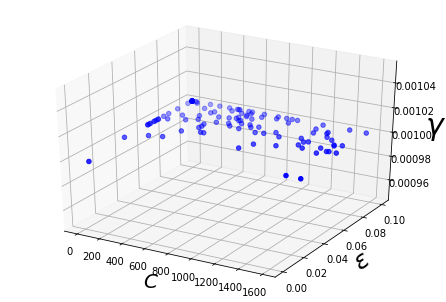






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.962559

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 335.450912

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 252.721609

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 280.948256

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 255.620868

Best Configuration Found:

SVR(C=692.1677795333417, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08282461736783434, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



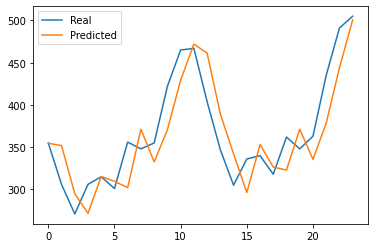


Ensemble Model series` predicitions:



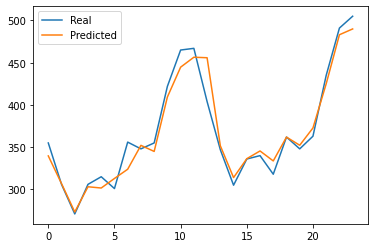


Ensemble Model best Average series` predicitions:



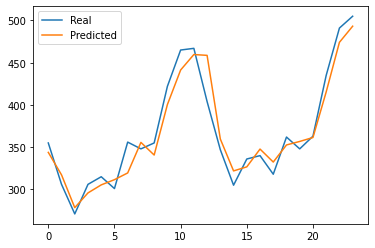


Ensemble Model K best Average series` predicitions:



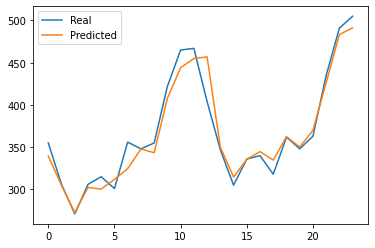


Ensemble Model best Median series` predicitions:



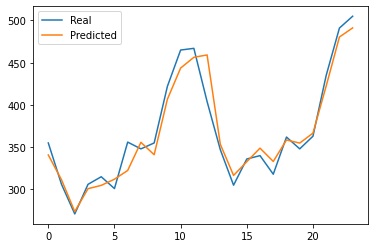


Ensemble Model K best Median series` predicitions:



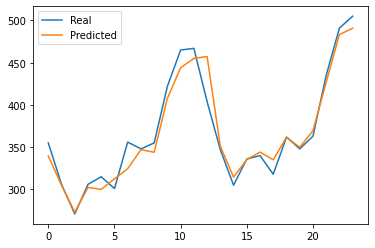






 Displaying Results for the test set



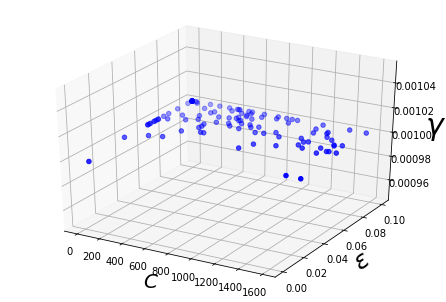






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.911640

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 968.702999

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 792.355612

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 850.102664

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 793.838801

Best Configuration Found:

SVR(C=692.1677795333417, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08282461736783434, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



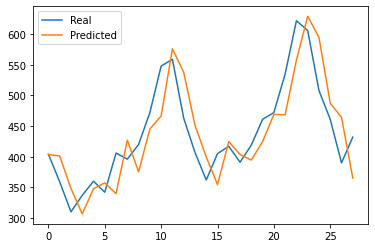


Ensemble Model series` predicitions:



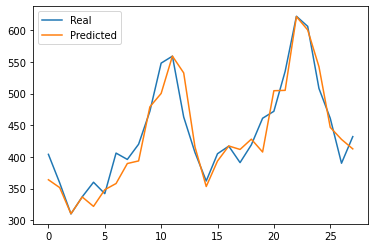


Ensemble Model best Average series` predicitions:



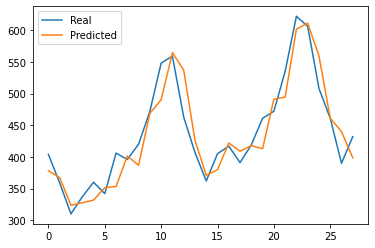


Ensemble Model K best Average series` predicitions:



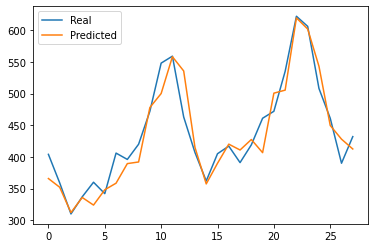


Ensemble Model best Median series` predicitions:



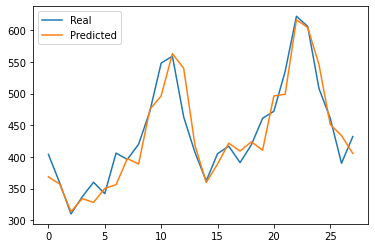


Ensemble Model K best Median series` predicitions:



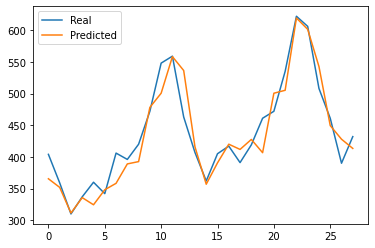






Best G-best on val set: Experiment # 4 . Mean Squared Error = 248.962559


Best G-best on test set: Experiment # 1 . Mean Squared Error = 791.911640



In [77]:
pso(120, 100, 3, 1, 50, 5)

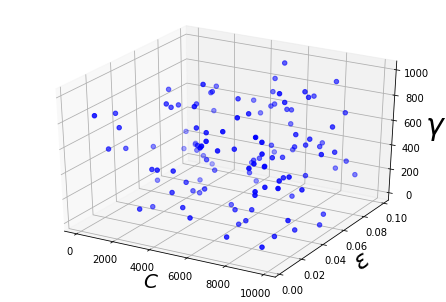






Experiment # 1: done. MSE_g_Best_val: 249.063129; MSE_AV_val: 347.986521; MSE_MD_val: 289.348253; MSE_k_AV_val: 252.807563; MSE_k_MD_val: 252.205974


MSE_g_Best: 793.231667; MSE_AV: 913.636936; MSE_MD: 843.299387; MSE_k_AV: 794.376286; MSE_k_MD: 779.721324


Experiment # 2: done. MSE_g_Best_val: 249.195506; MSE_AV_val: 344.852580; MSE_MD_val: 286.095289; MSE_k_AV_val: 253.382262; MSE_k_MD_val: 252.973733


MSE_g_Best: 792.231723; MSE_AV: 907.565290; MSE_MD: 829.521938; MSE_k_AV: 790.356372; MSE_k_MD: 780.079403


Experiment # 3: done. MSE_g_Best_val: 248.806825; MSE_AV_val: 339.738840; MSE_MD_val: 276.870260; MSE_k_AV_val: 255.196363; MSE_k_MD_val: 258.582668


MSE_g_Best: 792.778602; MSE_AV: 901.081812; MSE_MD: 814.613368; MSE_k_AV: 793.926036; MSE_k_MD: 792.187219


Experiment # 4: done. MSE_g_Best_val: 249.193746; MSE_AV_val: 349.099756; MSE_MD_val: 289.108624; MSE_k_AV_val: 253.167441; MSE_k_MD_val: 260.115094


MSE_g_Best: 792.109730; MSE_AV: 916.123181; MSE_MD: 837.227507; 

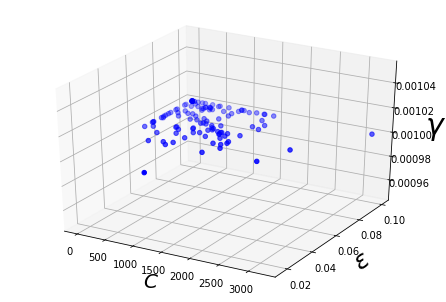






Mean Squared Error for the ARIMA Model:	 1181.957409

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 248.806825

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 339.738840

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 255.196363

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 276.870260

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 258.582668

Best Configuration Found:

SVR(C=688.0053279527515, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.0825007523511129, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



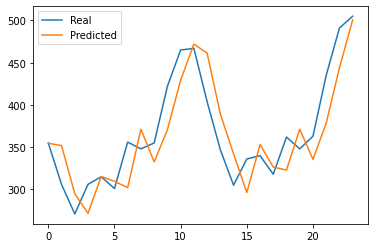


Ensemble Model series` predicitions:



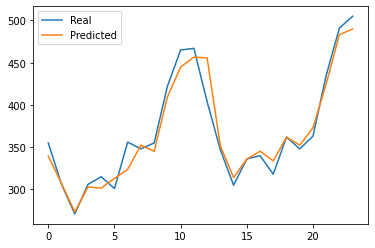


Ensemble Model best Average series` predicitions:



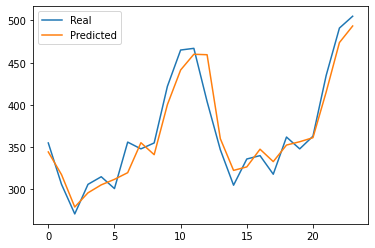


Ensemble Model K best Average series` predicitions:



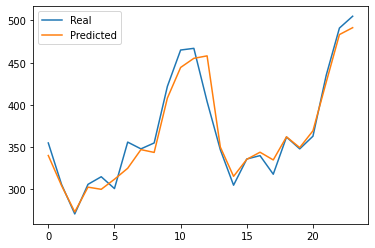


Ensemble Model best Median series` predicitions:



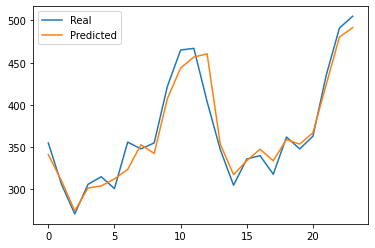


Ensemble Model K best Median series` predicitions:



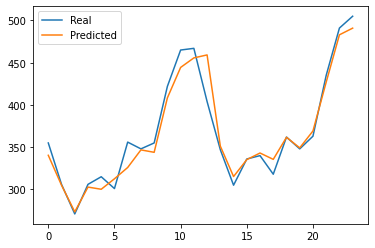






 Displaying Results for the test set



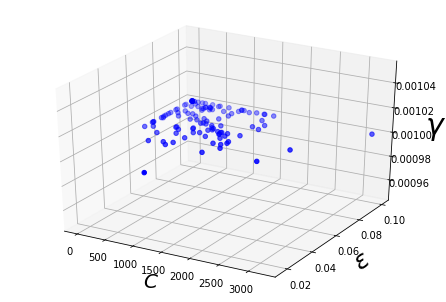






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.109730

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 916.123181

Mean Squared Error with the K best Average for the ARIMA + (PSO+SVR) Model Ensemble:	 798.114784

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 837.227507

Mean Squared Error with the K best Median for the ARIMA + (PSO+SVR) Model Ensemble:	 804.638859

Best Configuration Found:

SVR(C=688.0053279527515, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.0825007523511129, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



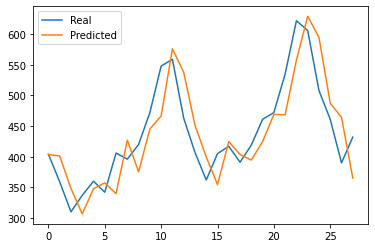


Ensemble Model series` predicitions:



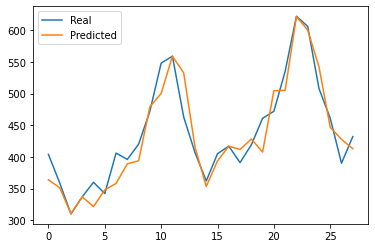


Ensemble Model best Average series` predicitions:



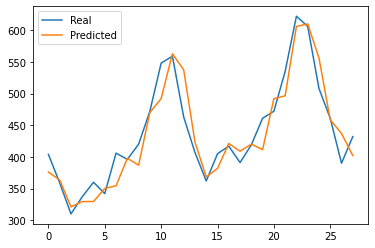


Ensemble Model K best Average series` predicitions:



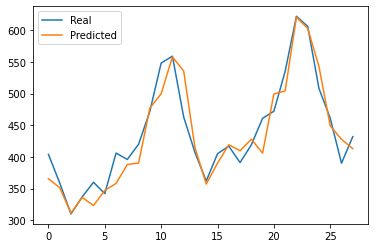


Ensemble Model best Median series` predicitions:



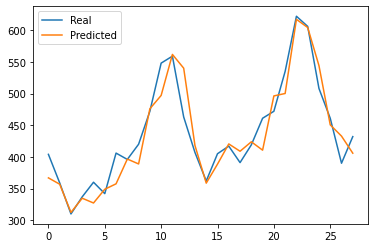


Ensemble Model K best Median series` predicitions:



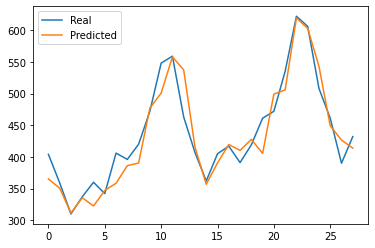






Best G-best on val set: Experiment # 3 . Mean Squared Error = 248.806825


Best G-best on test set: Experiment # 4 . Mean Squared Error = 792.109730



In [78]:
pso(120, 100, 3, 1, 60, 5)